In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
import QuantumPartonShower_clean as qpsc
import plotting as pl
import matplotlib

from PaperPlots import MakeObservables as mo

Number of emissions:  1
log(theta_max):  (-5.180816459236603, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  2
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-3.4538776394910684, array([-5.75646273, -3.45387764, -1.15129255]), array([-6.90775528, -4.60517019, -2.30258509,  0.        ]))


In [3]:
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED as qps_rhs
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED2 as qps_rhs2

## Simplified version numba 1

In [108]:
eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000
N= 2

qps= qps_rhs.QuantumPartonShower(N, 1)
qps2= qps_rhs.QuantumPartonShower(N, 1)

qc, qubits= qps.createCircuit(eps, g_1, g_2, 1, initialParticles)
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 0, initialParticles)

print('Qubits: ' + str(qc.num_qubits))
#print('Clbits: ' + str(qc.num_bits))
print('Gates: ' + str(qc.count_ops()))

t1= time.time()
counts= qps.simulate('qasm', shots=shots)
t2= time.time()
counts2= qps2.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 1: ' + str(t2-t1))
print('Time to simulate withg g12= 0: ' + str(t3-t2))

[0.1778279410038923, 0.005623413251903491]
Applying step 1.
Apply uCount()...

Simplification #1 complete. 

Apply uE()...
Apply U_h()...

Simplification #2 complete. 

Measure and reset |h>...
Reset |e>...
Apply U_p()...

Applying step 2.
Apply uCount()...
Apply uE()...
a-phi emit angle: 2.8425080332709003
b-phi emit angle: 2.373768321463957
a emit angle: 2.3405999177122077
b emit angle: 0.39916368419096393
Apply U_h()...
na= 1, nphi= 1 : angle: 1.5602650970560092
nb= 1, nphi= 1 : angle: 0.2867578605024784
Apply U_p()...
[0.1778279410038923, 0.005623413251903491]
Applying step 1.
Apply uCount()...

Simplification #1 complete. 

Apply uE()...
Apply U_h()...

Simplification #2 complete. 

Measure and reset |h>...
Reset |e>...
Apply U_p()...

Applying step 2.
Apply uCount()...
Apply uE()...
a-phi emit angle: 2.55250497761393
b-phi emit angle: 2.2338879763182127
a emit angle: 1.9111924693478755
b emit angle: 1.0246817839135496
Apply U_h()...
na= 1, nphi= 1 : angle: 1.4594553124539327
nb= 

0 0 0 00 00 00 01 000 001 101 000 0 phi f2 9
1 0 0 00 00 10 01 100 111 101 000 f1 af2 f2 30
2 0 0 00 00 01 00 001 000 101 000 phi 0 f2 53
3 0 0 00 00 10 01 100 110 100 000 f1 af1 f1 791
4 0 0 00 00 10 01 101 110 101 000 f2 af1 f2 37
5 0 0 00 00 10 01 110 101 101 000 af1 f2 f2 33
6 0 0 00 00 10 01 111 101 100 000 af2 f2 f1 183
7 0 0 00 00 10 01 110 101 100 000 af1 f2 f1 198
8 0 0 00 00 10 01 111 100 101 000 af2 f1 f2 35
9 0 0 00 00 10 01 101 111 101 000 f2 af2 f2 32
10 0 0 00 00 10 01 111 101 101 000 af2 f2 f2 26
11 0 0 00 00 00 00 000 000 100 000 0 0 f1 1386
12 0 0 00 00 10 01 100 110 101 000 f1 af1 f2 110
13 0 0 00 00 01 00 001 000 100 000 phi 0 f1 983
14 0 0 00 00 10 01 101 111 100 000 f2 af2 f1 206
15 0 0 00 00 00 01 000 001 100 000 0 phi f1 146
16 0 0 00 00 10 01 110 100 101 000 af1 f1 f2 140
17 0 0 00 00 00 00 000 000 101 000 0 0 f2 1293
18 0 0 00 00 10 01 101 110 100 000 f2 af1 f1 183
19 0 0 00 00 01 01 001 001 100 000 phi phi f1 2233
20 0 0 00 00 10 01 100 111 100 000 f1 af2 f1 

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:96: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


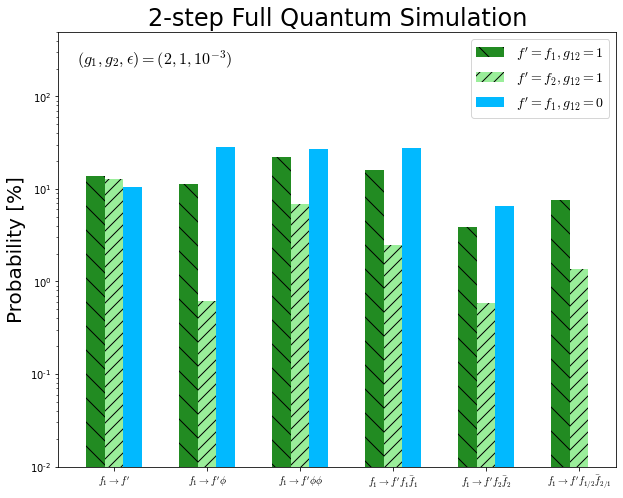

In [5]:
#for c in counts:
#    print(c, counts[c])
    
pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False)

In [11]:
import qiskit

qiskit.__version__

'0.18.3'

## Simplified version numba 2

In [3]:
#import QuantumPartonShower_ReM_hardcode_SIMPLIFIED2 as qps_rhs2
#import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full as qps_rhs2
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps_rhs2

eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000
N= 1

qpsS= qps_rhs2.QuantumPartonShower(N, 1)
qps2S= qps_rhs2.QuantumPartonShower(N, 1)

qcS, qubitsS= qpsS.createCircuit(eps, g_1, g_2, 1, initialParticles)
qc2S, qubits2S= qps2S.createCircuit(eps, g_1, g_2, 0, initialParticles)

qcT= compiler.transpile(qcS, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)
    
print('Qubits: ' + str(qcS.num_qubits))
#print('Clbits: ' + str(qc.num_bits))
print('Gates: ' + str(qcS.count_ops()))
print('Transpiled Gates: ' + str(qcT.count_ops()))

t1= time.time()
counts= qpsS.simulate('qasm', shots=shots)
t2= time.time()
counts2= qps2S.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 1: ' + str(t2-t1))
print('Time to simulate withg g12= 0: ' + str(t3-t2))



g_a= 2.6180, g_b= 0.3820, u= 0.5257
Delta_aList: [0.02310487841255638]
Delta_bList: [0.9229313751223984]
Delta_phiList: [0.021324217205336473]
P_aList: [-1.8838557485302034]
P_bList: [-0.0401001985282944]
P_phiList: [-1.923955947058498]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.02310487841255638
	 DeltaB: 0.9229313751223984
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


g_a= 2.0000, g_b= 1.0000, u= 0.0000
Delta_aList: [0.11093544797188865]
Delta_bList: [0.5771219406658367]
Delta_phiList: [0.06402328102217032]
P_aList: [-1.0994033983191416]
P_bList: [-0.2748508495797854]
P_phiList: [-1.374254247898927]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.11093544797188865
	 DeltaB: 0.5771219406658367
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
Qubits: 9
Gates: OrderedDict([('x', 5), ('measure', 3), ('reset', 3), ('cu3', 2), ('cry', 2), ('ry', 1)])
Trans

0 000 001 000 001 101 0 phi f2 10
1 110 101 111 101 101 af2 f2 f2 39
2 110 101 101 111 101 f2 af2 f2 38
3 000 001 000 001 100 0 phi f1 135
4 110 101 100 111 101 f1 af2 f2 36
5 110 101 100 111 100 f1 af2 f1 227
6 000 000 000 000 100 0 0 f1 1385
7 101 100 001 000 101 phi 0 f2 45
8 110 101 110 101 101 af1 f2 f2 36
9 110 101 101 111 100 f2 af2 f1 205
10 110 101 100 110 100 f1 af1 f1 731
11 110 101 111 101 100 af2 f2 f1 182
12 110 101 100 110 101 f1 af1 f2 120
13 110 101 111 100 100 af2 f1 f1 185
14 110 101 101 110 100 f2 af1 f1 186
15 110 101 110 101 100 af1 f2 f1 172
16 110 101 101 110 101 f2 af1 f2 33
17 101 101 001 001 101 phi phi f2 767
18 110 101 110 100 101 af1 f1 f2 152
19 110 101 110 100 100 af1 f1 f1 761
20 101 101 001 001 100 phi phi f1 2246
21 110 101 111 100 101 af2 f1 f2 32
22 101 100 001 000 100 phi 0 f1 979
23 000 000 000 000 101 0 0 f2 1298


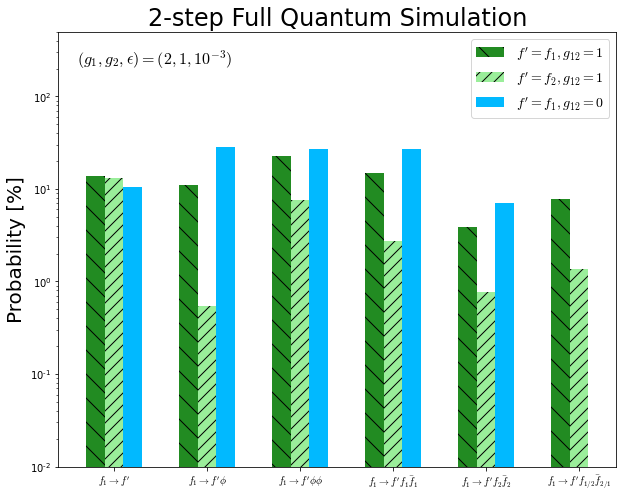

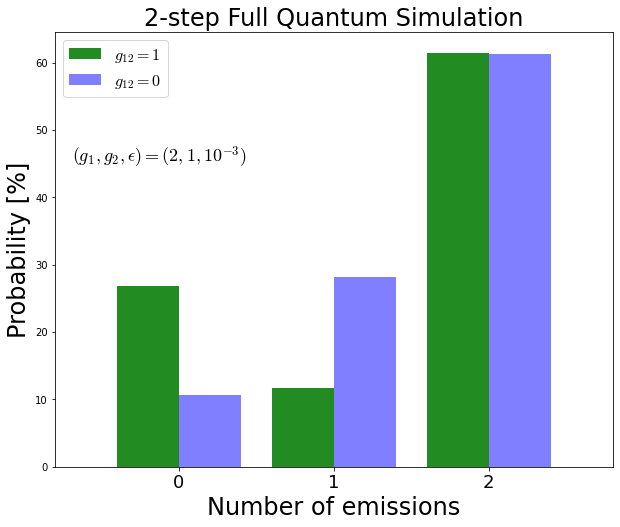

In [119]:
#for c in counts:
#    print(c, counts[c])
    
pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False, wReg=False)
#pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False)
#pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False, wReg=False)

In [114]:
qcS.draw()

┌─────────────┐┌───┐           ┌───┐       ┌───┐                   »
    p_0: ┤ Ry(-1.1071) ├┤ X ├──■────────┤ X ├───────┤ X ├───────────────────»
         └─────────────┘└┬─┬┘  │        └───┘       └───┘                   »
    p_1: ────────────────┤M├───┼────────────────────────────────────────────»
              ┌───┐      └╥┘   │                                            »
    p_2: ─────┤ X ├───────╫────┼────────────────────────────────────────────»
              └───┘       ║    │                                            »
    p_3: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    p_4: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    p_5: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    p_6: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    p_7: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    p_8: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    h_0: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │                                            »
    h_1: ─────────────────╫────┼────────────────────────────────────────────»
                          ║    │  ┌────────────────┐     ┌─────────────────┐»
    e_0: ─────────────────╫────┼──┤ U3(2.3406,0,0) ├─────┤ U3(0.39916,0,0) ├»
                          ║  ┌─┴─┐└───────┬────────┘┌───┐└────────┬────────┘»
  n_a_0: ─────────────────╫──┤ X ├────────■─────────┤ X ├─────────■─────────»
                          ║  └───┘                  └───┘                   »
p0_cl: 3/═════════════════╩═════════════════════════════════════════════════»
                          1                                                 »
p1_cl: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
p2_cl: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
h0_cl: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
h1_cl: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
na_cl: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                                  ┌───┐┌───┐                 »
«    p_0: ──────────────────────■──┤ X ├┤ X ├──────────────■──»
«                               │  └───┘└───┘              │  »
«    p_1: ──────────────────────┼──────────────────────────┼──»
«                               │                          │  »
«    p_2: ──────────────────────┼──────────────────────────┼──»
«                               │                  ┌───┐   │  »
«    p_3: ──────────────────────┼──────────────────┤ X ├───┼──»
«                               │                  └─╥─┘   │  »
«    p_4: ──────────────────────┼────────────────────╫─────┼──»
«                               │                    ║     │  »
«    p_5: ──────────────────────┼────────────────────╫─────┼──»
«                               │                    ║     │  »
«    p_6: ──────────────────────┼────────────────────╫─────┼──»
«                               │                    ║     │  »
«    p_

In [115]:
qcT.draw()

global phase: π/2
         ┌─────────────────┐                                   »
    p_0: ┤ U3(2.0344,-π,0) ├──■────────────────────────────────»
         └─────────────────┘  │                                »
    p_1: ─────────────────────┼────────────────────────────────»
                ┌───┐         │                                »
    p_2: ───────┤ X ├─────────┼────────────────────────────────»
                └───┘         │                                »
    p_3: ─────────────────────┼────────────────────────────────»
                              │                                »
    p_4: ─────────────────────┼────────────────────────────────»
                              │                                »
    p_5: ─────────────────────┼────────────────────────────────»
                              │                                »
    p_6: ─────────────────────┼────────────────────────────────»
                              │                                »
    p_7: ─────────────────────┼────────────────────────────────»
                              │                                »
    p_8: ─────────────────────┼────────────────────────────────»
                              │                                »
    h_0: ─────────────────────┼────────────────────────────────»
                              │                                »
    h_1: ─────────────────────┼────────────────────────────────»
                              │  ┌───┐┌──────────────────┐┌───┐»
    e_0: ─────────────────────┼──┤ X ├┤ U3(1.1703,-π,-π) ├┤ X ├»
                            ┌─┴─┐└─┬─┘└──────────────────┘└─┬─┘»
  n_a_0: ───────────────────┤ X ├──■────────────────────────■──»
                            └───┘                              »
p0_cl: 3/══════════════════════════════════════════════════════»
                                                               »
p1_cl: 3/══════════════════════════════════════════════════════»
                                                               »
p2_cl: 3/══════════════════════════════════════════════════════»
                                                               »
h0_cl: 3/══════════════════════════════════════════════════════»
                                                               »
h1_cl: 3/══════════════════════════════════════════════════════»
                                                               »
na_cl: 1/══════════════════════════════════════════════════════»
                                                               »
«                                                                             »
«    p_0: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_1: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_2: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_3: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_4: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_5: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_6: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_7: ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    p_8: ────────────────────────────────────────────────────────────────────»
«      

In [21]:
q= QuantumRegister(3)
cl= ClassicalRegister(2)
cl2= ClassicalRegister(1)

qc= QuantumCircuit(q, cl, cl2)
qc.x(0)
qc.x(2)
qc.measure(q[0], cl[0])
qc.measure(q[2], cl2[0])

#qc.x(1).c_if(cl, 1).c_if(cl2, 0)
qc.x(1).c_if(cl, 1).c_if(cl2, 0)

qc.measure(q[1], cl[1])
simulator= Aer.get_backend('qasm_simulator')


qc.draw()
#counts = execute(qc, simulator, shots=100).result().get_counts(qc)
#print(counts)

┌───┐┌─┐             
q483_0: ┤ X ├┤M├─────────────
        └───┘└╥┘    ┌───┐ ┌─┐
q483_1: ──────╫─────┤ X ├─┤M├
        ┌───┐ ║ ┌─┐ └─╥─┘ └╥┘
q483_2: ┤ X ├─╫─┤M├───╫────╫─
        └───┘ ║ └╥┘   ║    ║ 
  c0: 2/══════╩══╬════╬════╩═
              0  ║    ║    1 
                 ║ ┌──╨──┐   
  c1: 1/═════════╩═╡ = 0 ╞═══
                 0 └─────┘

In [59]:
q= QuantumRegister(3)
cl= ClassicalRegister(2)
cl2= ClassicalRegister(1)

qc= QuantumCircuit(q, cl, cl2)
qc.x(0)
qc.x(2)
qc.measure(q[0], cl[0])
qc.measure(q[2], cl2[0])
#qc.x(1).c_if(cl, 1).c_if(cl2, 0)
#qc.x(1).c_if(cl, 1)
#qc.x(1).c_if(cl2, 0)


gate= circuit.Gate('h', 1, [])
print(gate)
gate.c_if(cl2, 0)
print(gate)
gate.c_if(cl, 1)
print(gate)

qc.compose(gate, [q[0]], inplace=True)


qc.measure(q[1], cl[1])
simulator= Aer.get_backend('qasm_simulator')

qc.draw()
#counts = execute(qc, simulator, shots=100).result().get_counts(qc)
#print(counts)

┌───┐┌─┐   ┌─┐ ┌───┐    
q544_0: ┤ X ├┤M├───┤M├─┤ h ├────
        └───┘└╥┘   └╥┘ └─╥─┘ ┌─┐
q544_1: ──────╫─────╫────╫───┤M├
        ┌───┐ ║ ┌─┐ ║    ║   └╥┘
q544_2: ┤ X ├─╫─┤M├─╫────╫────╫─
        └───┘ ║ └╥┘ ║ ┌──╨──┐ ║ 
 c66: 2/══════╩══╬══╬═╡ = 1 ╞═╩═
              0  ║  ║ └─────┘ 1 
 c67: 1/═════════╩══╩═══════════
                 0  0

In [52]:
qc= QuantumCircuit(1)

qc.compose(gate, [qc.qubits[0]], inplace=True)
qc.measure_all()

counts = execute(qc, simulator, shots=100).result().get_counts(qc)
print(counts)

{'0': 48, '1': 52}


In [95]:
qc= QuantumCircuit(2)
qc.cu3(2*np.arccos(0), 0, 0, 0, 1)

qct= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)
qc.draw()

q_0: ──────■──────
     ┌─────┴─────┐
q_1: ┤ U3(π,0,0) ├
     └───────────┘

In [96]:
qct.draw()

q_0: ──■─────────────────■─────────────
     ┌─┴─┐┌───────────┐┌─┴─┐┌─────────┐
q_1: ┤ X ├┤ U2(-π,-π) ├┤ X ├┤ U2(0,0) ├
     └───┘└───────────┘└───┘└─────────┘

In [100]:
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps_rhs2


eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion
#initialParticles= ['001'] # 1 a-fermion, old convention

shots= 10000
N= 2

qpsS= qps_rhs2.QuantumPartonShower(N, 1)


na_i= 1
nb_i= 0

qpsS.MCMC(eps, g_1, g_2, na_i, nb_i, verbose= True)

Number of emissions:  1
log(theta_max):  (-5.180816459236603, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  2
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-3.4538776394910684, array([-5.75646273, -3.45387764, -1.15129255]), array([-6.90775528, -4.60517019, -2.30258509,  0.        ]))


Delta_a: 0.3330697343979015
Delta_b: 0.7596854221754138
Delta_phi: 0.25302822178992274
P_a: -0.5497016991595708
P_b: -0.1374254247898927
P_phi_a: -0.5497016991595708
P_phi_b: -0.1374254247898927
P_phi: -0.6871271239494635
t_mid: 0.1778279410038923

Step 1
P(emit a)= 0.6669302656020986
P(emit b)= 0.0
P(emit phi -> aa)= 0.0
P(emit phi -> bb)= 0.0
P(emit phi)= 0.0
P(no emit)= 0.33306973439

(0, 1, 0, 0)

N= 2
g_1= 2.00
eps= 0.0010
2.8114327877898755
Integral of original= 1.0020140598205587
Integral of original= 0.999999798552055
Integral of computed= 2.8114327877898755
[1.00265891e+00 8.86302462e-04]
[0.19253245 0.5791821 ]


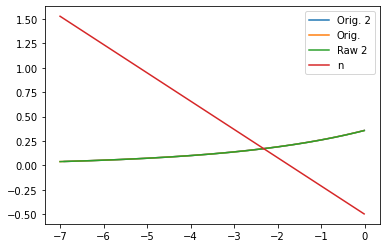

In [99]:
N= 2
eps= 0.001
g_1= 2

def delta_g(eps, g, N):
    return eps ** (g**2 / (4*N*math.pi))


def P(lnt, g):
    alpha = g**2 / (4 * math.pi)
    return alpha

def Delta(lnt, g):
    alpha = g**2 / (4 * math.pi)
    return np.exp(alpha * lnt)

def dsigma_d_t_max(lnt, lneps, g):
    return P(lnt, g) * Delta(lnt, g) / (1 - Delta(lneps, g))

def dsigma_d_t_max2(t, eps, g, N):
    c1= 1 / math.log(eps**(1/N))
    c2= 1 - eps**(g**2 / 4*N*math.pi)
    return c1 * c2 / eps**(g**2 / (8*N*math.pi)) * t**(g**2 / (4*N*math.pi))

def dsigma_d_t_max3(t, eps, g, N):
    n= (np.log(t) * N / np.log(eps)) - 0.5
    return abs((N / math.log(eps)) * eps**((g**2 * (n-1)) / (4*N*math.pi)) * (1 - eps**(g**2 / (4*N*math.pi))))

def dsigma_d_t_max4(t, eps, g, N):
    n= (np.log(t) * N / np.log(eps)) - 0.5
    return abs((N / math.log(eps)) * delta_g(eps, g_1, N)**(n-1) * (1 - delta_g(eps, g_1, N)))


dx= 0.01

num_points_ana= 1000
lnxList = np.log(eps**((np.arange(0, num_points_ana, 1)+0.5) / num_points_ana))

print('N= %d' %(N))
print('g_1= %.2f' %(g_1))
print('eps= %.4f' %(eps))
plt.plot(lnxList, dsigma_d_t_max(lnxList, np.log(eps), g_1), label='Orig. 2')
plt.plot(np.arange(-7, 0, dx), dsigma_d_t_max(np.arange(-7, 0, dx), np.log(eps), g_1), label='Orig.')
#plt.plot(np.arange(-7, 0, dx), dsigma_d_t_max2(np.exp(np.arange(-7, 0, dx)), eps, g_1, N), label='Simplified')
#plt.plot(np.arange(-7, 0, dx), dsigma_d_t_max3(np.exp(np.arange(-7, 0, dx)), eps, g_1, N), label='Raw')

norm= dx*np.sum(dsigma_d_t_max4(np.exp(np.arange(-7, 0, dx)), eps, g_1, N))
print(norm)
plt.plot(np.arange(-7, 0, dx), dsigma_d_t_max4(np.exp(np.arange(-7, 0, dx)), eps, g_1, N) / norm, label='Raw 2')

plt.plot(np.arange(-7, 0, dx), (np.arange(-7, 0, dx) * N / np.log(eps)) - 0.5, label='n')
plt.legend()

print('Integral of original= ' + str(0.01*np.sum(dsigma_d_t_max(np.arange(-7, 0, dx), np.log(eps), g_1))))
print('Integral of original= ' + str((lnxList[0]-lnxList[1])*np.sum(dsigma_d_t_max(lnxList, np.log(eps), g_1))))
print('Integral of computed= ' + str(0.01*np.sum(dsigma_d_t_max4(np.exp(np.arange(-7, 0, dx)), eps, g_1, N))))

print(((np.arange(-7, 0, dx) * N / np.log(eps)) - 0.5)[np.where(((np.arange(-7, 0, dx) * N / np.log(eps)) - 0.5) % 1 < (1/300))])
print(dsigma_d_t_max4(np.exp(np.arange(-7, 0, dx)), eps, g_1, N)[np.where(((np.arange(-7, 0, dx) * N / np.log(eps)) - 0.5) % 1 < (1/300))])
#print(delta_g(eps, g_1, N)**(5) * (1 - delta_g(eps, g_1, N)))